In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Preprocess
We merge the 8-year daily closing price of 11390 individual stocks into 9 stock indices time series data on the colab GPU.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import os
os.chdir('./drive/Team Drives/Decision Theory/data/')

Group by 10 Industry

In [0]:
df = pd.read_csv('daily_price.csv',low_memory=False)

In [0]:
def cal_ind(x):
    try:
        x = int(x)

        if x>=1 and x<=9 :
            return 'Agriculture'
        elif x>=10 and x<=14:
            return 'Mining'
        elif x>=15 and x<=17:
            return 'Construction'
        elif x>=20 and x<=39:
            return 'Manufactoring'
        elif x>=40 and x<=49:
            return 'Transportation'
        elif x>=50 and x<=51:
            return 'Wholesale'
        elif x>=52 and x<=59:
            return 'Retail'
        elif x>=60 and x<=67:
            return 'Finance'
        elif x>=70 and x<=89:
            return 'Services'
        elif x>=91 and x<=99:
            return 'Public'
        else:
            return 'Other'
    except:
        return np.nan

In [0]:
df=df.dropna()
df['industry']=df['SICCD'].apply(lambda se:cal_ind(se[:2]) )

In [0]:
df = df.dropna()

In [0]:
df.columns=['PERMNO','date','SICCD','low','high','close','open','industry']

In [0]:
df.to_csv('data.csv')

### Calculate industry indices.



In [0]:
df=pd.read_csv('data.csv',index_col=0,low_memory=False)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [0]:
df.head()

,PERMNO,date,SICCD,low,high,close,open,industry
0,10001,20100104,4925,10.10,10.5800,10.25,10.58,Transportation
1,10001,20100105,4925,9.80,10.3600,10.19,10.18,Transportation
2,10001,20100106,4925,10.15,10.4800,10.31,10.18,Transportation
3,10001,20100107,4925,9.91,10.3695,9.96,10.28,Transportation
4,10001,20100108,4925,10.00,10.4000,10.34,10.00,Transportation


In [0]:
target_col=['close', 'low', 'high', 'open']
a=df.groupby(['date','industry'])[target_col].mean().unstack()
a.index= pd.to_datetime(a.index,format='%Y%m%d')

In [0]:
a.head()

close                                              \
industry   Construction    Finance Manufactoring     Mining   Other   
date                                                                  
2010-01-04    27.707500  65.507538     20.084481  21.098468  21.915   
2010-01-05    27.807690  65.830455     20.195778  21.387686  21.970   
2010-01-06    27.964614  66.142888     20.277470  21.711506  21.715   
2010-01-07    28.629108  66.229848     20.362396  21.642212  21.970   
2010-01-08    29.115584  66.612488     20.446907  21.888843  21.980   

                                                                       ...  \
industry       Public     Retail   Services Transportation  Wholesale  ...   
date                                                                   ...   
2010-01-04  13.619167  21.062450  18.598789      22.764533  19.276611  ...   
2010-01-05  14.008396  21.030696  18.636101      22.823604  19.462535  ...   
2010-01-06  14.292948  21.118698  18.604432      22.877452  19.574467  ...   
2010-01-07  13.936618  21.232373  18.591263      22.882703  19.811392  ...   
2010-01-08  14.219720  21.331934  18.840240      22.921272  19.611474  ...   

                   open                                              \
industry   Construction    Finance Manufactoring     Mining   Other   
date                                                                  
2010-01-04    27.312885  65.305906     19.879243  20.708486  21.870   
2010-01-05    27.528654  65.859789     20.161350  21.164035  21.880   
2010-01-06    27.780961  66.189020     20.185790  21.452826  22.085   
2010-01-07    28.133644  65.948314     20.335147  21.650977  21.720   
2010-01-08    29.021912  66.348876     20.273738  21.595781  22.080   

                                                                       
industry       Public     Retail   Services Transportation  Wholesale  
date                                                                   
2010-01-04  13.440435  21.134788  18.457590      22.653440  19.127448  
2010-01-05  14.037747  21.066291  18.642610      22.782726  19.447455  
2010-01-06  14.277172  21.072519  18.644847      22.886329  19.509662  
2010-01-07  13.958082  21.150620  18.548836      22.907944  19.754147  
2010-01-08  14.057676  21.238670  18.705563      22.789590  19.497785  

[5 rows x 40 columns]

In [0]:
for ind in df['industry'].unique():
    print(ind)
    data_ind=a.loc[:,(target_col,ind)]
    data_ind.columns=target_col
    data_ind.to_csv(ind+'.csv')

Transportation
Finance
Manufactoring
Wholesale
Services
Public
Construction
Retail
Mining
Other


In [0]:
b=df.groupby(['date','industry'])['close'].count().unstack()

In [0]:
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tqdm import tqdm
from docopt import docopt
try:
    from hmmlearn import hmm
except:
    !pip install hmmlearn
    from hmmlearn import hmm
from hmmlearn.hmm import GaussianHMM

    100% |████████████████████████████████| 153kB 8.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/9a/a4/ee/917f0de81626b684fd2139ef5df47744c35ebeacc9e950487b
Successfully built hmmlearn


In [0]:

class StockPredictor(object):
    def __init__(self, data, test_size=0.33,
                 n_hidden_states=4, n_latency_days=10,
                 n_steps_frac_change=50, n_steps_frac_high=10,
                 n_steps_frac_low=10):
 
        #self.company = company
        self.data = data
        self.n_latency_days = n_latency_days
 
        self.hmm = hmm.GaussianHMM(n_components=n_hidden_states)
 
        self._split_train_test_data(test_size)
        self.n_hidden_states = n_hidden_states
 
        self._compute_all_possible_outcomes(
            n_steps_frac_change, n_steps_frac_high, n_steps_frac_low)
 
    def _split_train_test_data(self, test_size):
        data = self.data
        _train_data, test_data = train_test_split(
            data, test_size=test_size, shuffle=False)
 
        self._train_data = _train_data
        self._test_data = test_data
 
    @staticmethod
    def _extract_features(data):
        open_price = np.array(data['open'])
        close_price = np.array(data['close'])
        high_price = np.array(data['high'])
        low_price = np.array(data['low'])
 
        # Compute the fraction change in close, high and low prices
        # which would be used a feature
        frac_change = (close_price - open_price) / open_price
        frac_high = (high_price - open_price) / open_price
        frac_low = (open_price - low_price) / open_price
 
        return np.column_stack((frac_change, frac_high, frac_low))
 
    def fit(self):
        #self._logger.info('>>> Extracting Features')
        feature_vector = StockPredictor._extract_features(self._train_data)
        #self._logger.info('Features extraction Completed <<<')
 
        self.hmm.fit(feature_vector)
 
    def _compute_all_possible_outcomes(self, n_steps_frac_change,
                                       n_steps_frac_high, n_steps_frac_low):
        frac_change_range = np.linspace(-0.1, 0.1, n_steps_frac_change)
        frac_high_range = np.linspace(0, 0.1, n_steps_frac_high)
        frac_low_range = np.linspace(0, 0.1, n_steps_frac_low)
 
        self._possible_outcomes = np.array(list(itertools.product(
            frac_change_range, frac_high_range, frac_low_range)))
 
    def _get_most_probable_outcome(self, day_index):
        previous_data_start_index = max(0, day_index - self.n_latency_days)
        previous_data_end_index = max(0, day_index - 1)
        previous_data = self._test_data.iloc[previous_data_end_index: previous_data_start_index]
        previous_data_features = StockPredictor._extract_features(
            previous_data)
 
        outcome_score = []
        for possible_outcome in self._possible_outcomes:
            total_data = np.row_stack(
                (previous_data_features, possible_outcome))
            outcome_score.append(self.hmm.score(total_data))
        most_probable_outcome = self._possible_outcomes[np.argmax(
            outcome_score)]
 
        return most_probable_outcome
 
    def predict_close_price(self, day_index):
        open_price = self._test_data.iloc[day_index]['open']
        predicted_frac_change, _, _ = self._get_most_probable_outcome(
            day_index)
        return open_price * (1 + predicted_frac_change)
 
    def predict_close_prices_for_days(self, days, with_plot=False,title='HMM prediction with hidden states '):
        predicted_close_prices = []
        for day_index in tqdm(range(days)):
            predicted_close_prices.append(self.predict_close_price(day_index))
 
        if with_plot:
            test_data = self._test_data[0: days]
#             days = pd.to_datetime(test_data.index,format='%Y%m%d')
            actual_close_prices = test_data['close']
 
            fig = plt.figure(figsize=(18,6))
 
            axes = fig.add_subplot(111)
            axes.plot_date(days, actual_close_prices, 'bo-', label="actual")
            axes.plot_date(days, predicted_close_prices, 'r+-', label="predicted")
            #axes.set_title('{company}'.format(company=self.company))
            plt.title(title+str(self.n_hidden_states))
 
            fig.autofmt_xdate()
 
            plt.legend()
            plt.show()
 
        return predicted_close_prices

In [0]:
def run_industry(a,ind='Transportation',target_col=['close', 'low', 'high', 'open'],n_days=60,n_hidden_states_list=range(2,6)):
  ind_data = a.loc[:,(target_col, ind)]
  ind_data.columns = target_col
  
  stock_predictor_list = []
  for n_hidden_state in n_hidden_states_list:
    stock_predictor = StockPredictor(data = ind_data,n_hidden_states=n_hidden_state)
    stock_predictor.fit()
    stock_predictor.predict_close_prices_for_days(n_days, with_plot=True)
    stock_predictor_list.append(stock_predictor)
    
  return stock_predictor_list

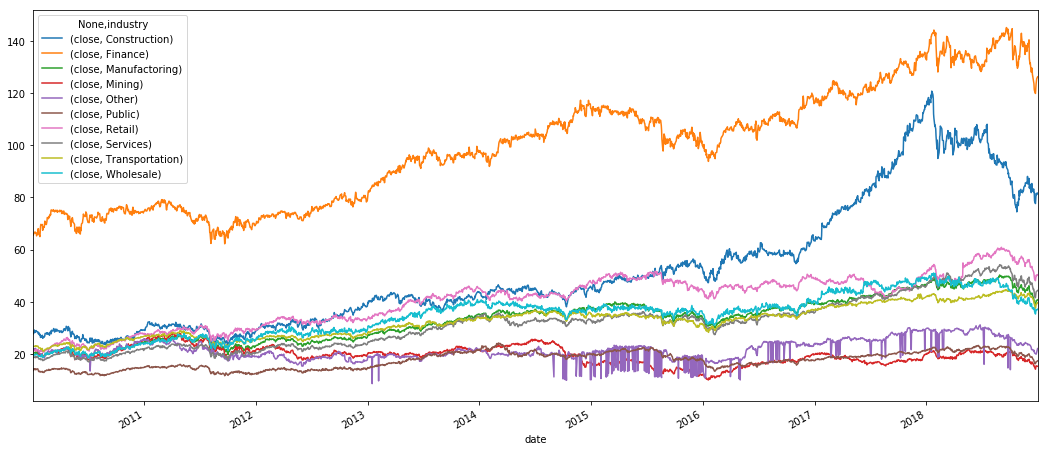

In [0]:
a.loc[:,('close',slice(None))].plot(figsize=(18,8))


100%|██████████| 60/60 [01:52<00:00,  1.88s/it]


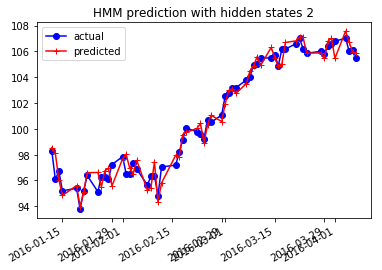

In [0]:
Finance = run_industry(a,ind='Finance',n_days=60,n_hidden_states_list=range(2,3))

In [0]:
Finance[0].hmm.covars_, Finance[0].hmm.means_

(array([[[4.71391344e-05, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 4.10244187e-05, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 1.69710605e-05]],
 
        [[6.33678370e-05, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 2.99574253e-05, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 7.90554756e-05]]]),
 array([[ 0.00277958,  0.00759795,  0.00519344],
        [-0.00556111,  0.00429732,  0.01105696]]))

In [0]:
Transportation[0].hmm.covars_, Transportation[0].hmm.means_

(array([[[3.77295899e-05, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 1.77174014e-05, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 1.89649700e-05]],
 
        [[3.43430661e-04, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 1.66286302e-04, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 2.07848025e-04]]]),
 array([[ 0.00060571,  0.01068972,  0.01059455],
        [-0.00452539,  0.01471418,  0.02038132]]))


100%|██████████| 60/60 [01:55<00:00,  1.99s/it]


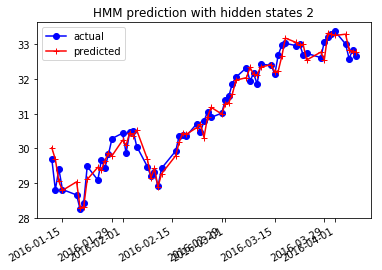


100%|██████████| 60/60 [01:55<00:00,  1.92s/it]


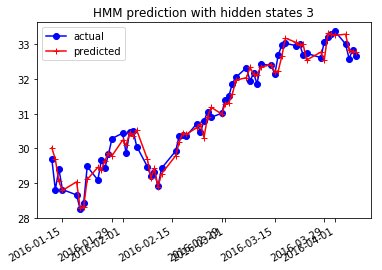

In [0]:
Transportation = run_industry(a,ind='Transportation',n_days=60,n_hidden_states_list=range(2,4))

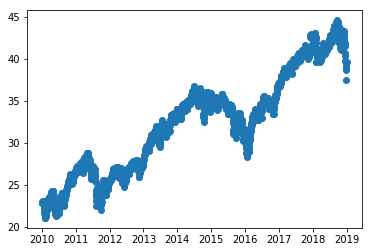

In [0]:
plt.plot_date(pd.to_datetime(ind.index,format='%Y%m%d'),ind['close'])